# Telco Customer Churn

##### Meks Egbuchunam

Dataset: [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

In this notebook, I will explore customer churn for a telecom company through an in-depth analysis of the customer attributes outlined in the dataset. Using these insights, I will build and train several machine learning models to predict which customers are likely to churn.

## Data Collection

Retrieving the dataset from Kaggle

In [1]:
# importing the necessary tools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Loading the csv file

df = pd.read_csv("D:/DS Projects/Churn (Telco)/Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")

clone_df = df.copy()

clone_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


------------------

## Data Cleaning/Preprocessing

In [3]:
clone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are many "object" columns, so I will be scanning through each column to make sure the data type is consistent.

In [4]:
for col in clone_df.select_dtypes(include = 'object').columns:
    print(f"column: {col}")
    print(clone_df[col].unique())
    print("-" * 40)

column: customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
----------------------------------------
column: gender
['Female' 'Male']
----------------------------------------
column: Partner
['Yes' 'No']
----------------------------------------
column: Dependents
['No' 'Yes']
----------------------------------------
column: PhoneService
['No' 'Yes']
----------------------------------------
column: MultipleLines
['No phone service' 'No' 'Yes']
----------------------------------------
column: InternetService
['DSL' 'Fiber optic' 'No']
----------------------------------------
column: OnlineSecurity
['No' 'Yes' 'No internet service']
----------------------------------------
column: OnlineBackup
['Yes' 'No' 'No internet service']
----------------------------------------
column: DeviceProtection
['No' 'Yes' 'No internet service']
----------------------------------------
column: TechSupport
['No' 'Yes' 'No internet service']
------------------------

'TotalCharges' is listed as an object column even though it has numbers in it which may suggest missing values or empty strings

In [5]:
# Converting the column to a numerical one

clone_df["TotalCharges"] = pd.to_numeric(clone_df["TotalCharges"], errors="coerce")


In [6]:
# Checking for missing value or empty strings in the 'TotalCharges' column

clone_df["TotalCharges"].isna().sum()

11

In [7]:
# checking for any values of '0' in the 'tenure' column, as that may explain some empty strings in the 'TotalCharges' columns

clone_df[clone_df["tenure"] == 0]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


The number of rows where tenure = 0 matches the number of NaN values in the 'TotalCharges' column. This suggests that these customers have no total charges recorded because they haven’t been with the company for at least a month. Since the dataset is large, dropping these 11 unfilled rows will not significantly affect the results, and replacing them with the mean or median would not accurately reflect the context of the data.

In [8]:
# I could replace the NaN values with 0, but I would rather avoid any unnecessary data skews.

clone_df = clone_df.dropna(subset = ["TotalCharges"])

In [9]:
print(clone_df["TotalCharges"].isna().sum())
print((clone_df["tenure"] == 0).sum())

#The output should show zeros, indicating that the columns have been dropped

0
0


In [10]:
# The output should show 11 less rows in the cloned dataset now

print(clone_df.shape)
df.shape

(7032, 21)


(7043, 21)

In [11]:
# Dropping the 'customerID' column, as it is useless in predicting churn

clone_df = clone_df.drop("customerID", axis = 1)

In [12]:
clone_df.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
clone_df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There does not appear to be any more NaN values in the dataset

----------

The 'SeniorCitizen' column is the only one already in binary format, while many of the other columns use yes/no values. I will convert those columns to binary for consistency.

In [14]:
# Finding Columns with "Yes/No" entries

yes_no_cols = [col for col in clone_df.columns if 
               ("Yes" in clone_df[col].unique()) or ("No" in clone_df[col].unique())]

print(yes_no_cols)


['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']


Thirteen columns were returned in the output. However, upon reviewing the dataset, several of these columns include a third option, such as "No phone service" or "No internet service", in addition to the standard yes/no values. As a result, these columns cannot be converted into binary.

In [15]:
# Finding the five columns with only yes/no options (no third option).

yes_no_cols = [col for col in clone_df.columns 
               if set(clone_df[col].dropna().unique()).issubset({"Yes", "No"})]

print(yes_no_cols)

['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']


In [16]:
# Converting the five columns with only yes/no options (no third option) into binary.

clone_df[yes_no_cols] = clone_df[yes_no_cols].replace({"Yes": 1, "No": 0})

clone_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [17]:
scan = pd.DataFrame({
    "dtype": clone_df.dtypes,
    "unique_values": clone_df.nunique(),
    "num_missing": clone_df.isna().sum()
})

print(scan)


                    dtype  unique_values  num_missing
gender             object              2            0
SeniorCitizen       int64              2            0
Partner             int64              2            0
Dependents          int64              2            0
tenure              int64             72            0
PhoneService        int64              2            0
MultipleLines      object              3            0
InternetService    object              3            0
OnlineSecurity     object              3            0
OnlineBackup       object              3            0
DeviceProtection   object              3            0
TechSupport        object              3            0
StreamingTV        object              3            0
StreamingMovies    object              3            0
Contract           object              3            0
PaperlessBilling    int64              2            0
PaymentMethod      object              4            0
MonthlyCharges    float64   

---------------

## Exploratory Data Analysis (EDA)

In [18]:
num_cols = clone_df.select_dtypes(include=["int64", "float64"]).columns

non_binary_num_cols = [col for col in num_cols if clone_df[col].nunique() > 2]

print(non_binary_num_cols)


['tenure', 'MonthlyCharges', 'TotalCharges']


In [19]:
print("MEAN:")
print(clone_df[non_binary_num_cols].mean())
print()

print("MEDIAN:")
print(clone_df[non_binary_num_cols].median())
print()

print("MIN:")
print(clone_df[non_binary_num_cols].min())
print()

print("MAX:")
print(clone_df[non_binary_num_cols].max())


MEAN:
tenure              32.421786
MonthlyCharges      64.798208
TotalCharges      2283.300441
dtype: float64

MEDIAN:
tenure              29.000
MonthlyCharges      70.350
TotalCharges      1397.475
dtype: float64

MIN:
tenure             1.00
MonthlyCharges    18.25
TotalCharges      18.80
dtype: float64

MAX:
tenure              72.00
MonthlyCharges     118.75
TotalCharges      8684.80
dtype: float64


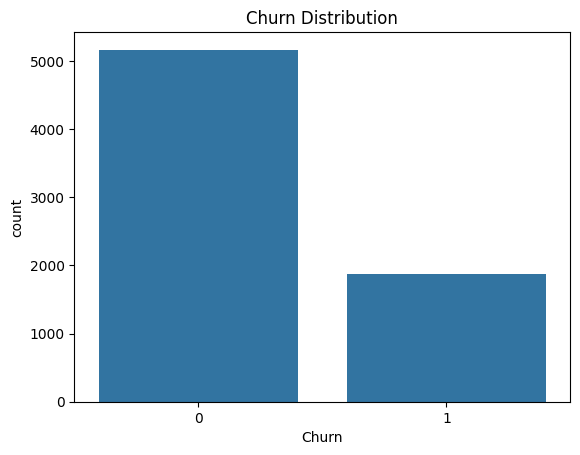

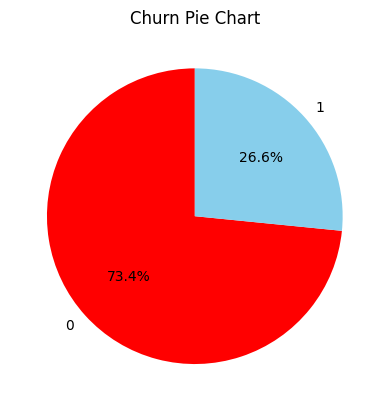

In [20]:
#Churn count per customer

sns.countplot(x="Churn", data=clone_df)
plt.title("Churn Distribution")
plt.show()

import matplotlib.pyplot as plt


churn_counts = clone_df["Churn"].value_counts()

# Pie chart
plt.pie(churn_counts, 
        labels=churn_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=["red", "skyblue"])

plt.title("Churn Pie Chart")
plt.show()



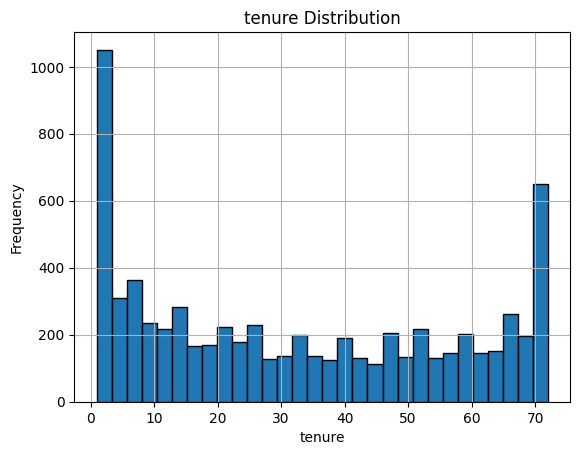

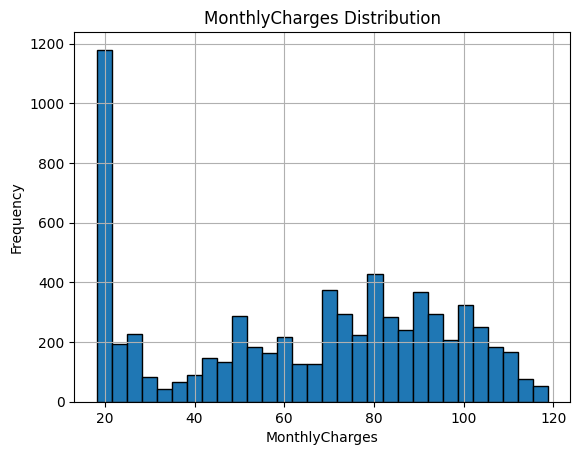

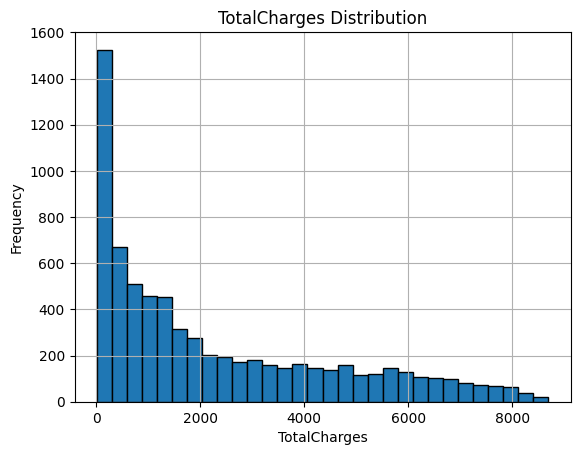

In [21]:
for col in non_binary_num_cols:
    plt.hist(clone_df[col], bins = 30, edgecolor = 'black')
    plt.title(f"{col} Distribution")
    plt.xlabel(f"{col}")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

For the charges ('MonthlyCharges' and 'TotalCharges'), the distributions are right-skewed, while 'tenure' shows a bimodal pattern. Although 'tenure' is likely correlated with 'TotalCharges', the variation in monthly charges across customers explains why the 'TotalCharges' histogram does not display a clear bimodal shape.

In [22]:
# Testing correlation

from scipy.stats import pointbiserialr

for col in non_binary_num_cols:
    corr, pval = pointbiserialr(clone_df[col], clone_df["Churn"])
    print(f"{col}: correlation = {corr:.3f}, p-value = {pval:.3g}")


tenure: correlation = -0.354, p-value = 9.44e-207
MonthlyCharges: correlation = 0.193, p-value = 6.76e-60
TotalCharges: correlation = -0.199, p-value = 4.88e-64


Among the continuous variables, 'tenure' shows the strongest relationship with churn (correlation = -0.354), indicating that customers with longer tenures are less likely to churn. 'MonthlyCharges' and 'TotalCharges' both show weak correlations with churn.

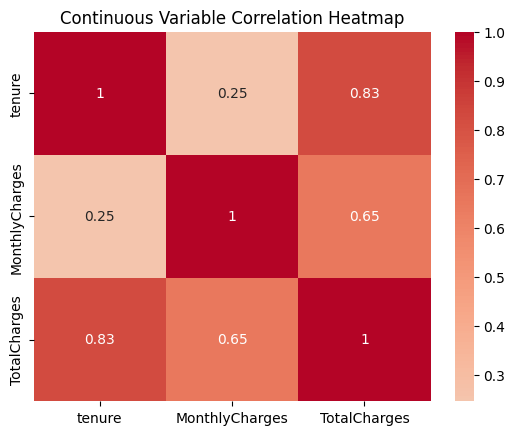

In [23]:
# Checking for redundancy among any of the numeric features in the dataset via heatmap.

corr_matrix = clone_df[non_binary_num_cols].corr()

sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center = 0)
plt.title("Continuous Variable Correlation Heatmap")
plt.show()

As expected, 'Tenure' and 'MonthlyCharges' have a strong relationship with 'TotalCharges'. However, they have a weak relationship with each other, reflecting the variety in "MonthlyCharges'.

In [24]:
#Checking correlation for the categorical variables in regards to churn rates

# making the list for the categorical variables

cat_col = []
for col in clone_df.columns:
    if col not in non_binary_num_cols + ["Churn"]:
        cat_col.append(col)

print(cat_col)
    

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [25]:
# Chi Square Test

import scipy.stats as stats

def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

for col in clone_df.columns:
    if col not in non_binary_num_cols + ["Churn"]:
        table = pd.crosstab(clone_df[col], clone_df["Churn"])
        cv = cramers_v(table.values)
        print(f"{col}: Cramér’s V = {cv:.3f}")


gender: Cramér’s V = 0.008
SeniorCitizen: Cramér’s V = 0.150
Partner: Cramér’s V = 0.150
Dependents: Cramér’s V = 0.163
PhoneService: Cramér’s V = 0.011
MultipleLines: Cramér’s V = 0.040
InternetService: Cramér’s V = 0.322
OnlineSecurity: Cramér’s V = 0.347
OnlineBackup: Cramér’s V = 0.292
DeviceProtection: Cramér’s V = 0.281
TechSupport: Cramér’s V = 0.343
StreamingTV: Cramér’s V = 0.230
StreamingMovies: Cramér’s V = 0.231
Contract: Cramér’s V = 0.410
PaperlessBilling: Cramér’s V = 0.191
PaymentMethod: Cramér’s V = 0.303


Among the categorical columns, 'Contract' shows the strongest relationship with customer churn (V = 0.410), suggesting that the type of contract plays a key role in whether a customer is likely to leave. 'OnlineSecurity' has the second strongest relationship with churn, followed by 'TechSupport'. As expected, gender has almost no predictive capability regarding churn (V = 0.008).

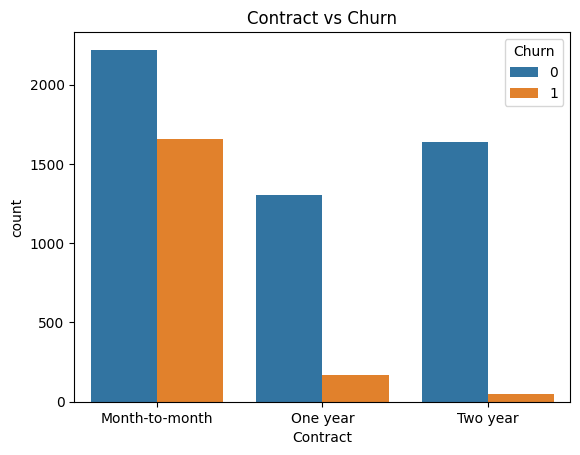

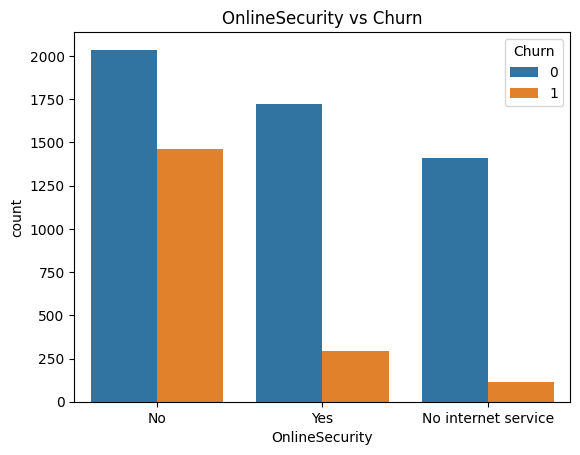

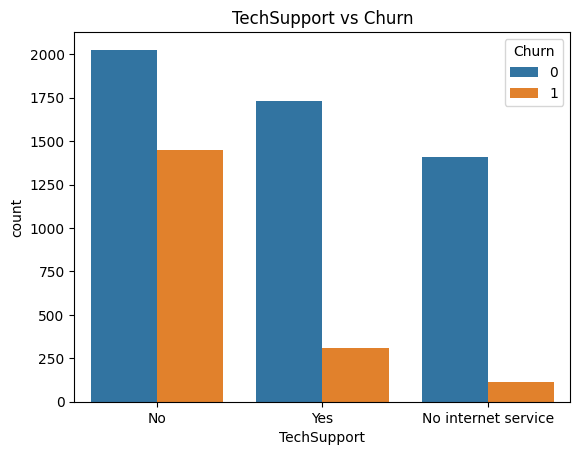

In [26]:
strong_cat = ['Contract', 'OnlineSecurity', 'TechSupport']

for col in strong_cat:
    sns.countplot(x=col, hue = 'Churn', data = clone_df)
    plt.title(f"{col} vs Churn")
    plt.show()
    

The bar plots visualize the churn ratio. As seen in the figures, lack of tech support and online security result in a higher amount of customer churn. Similarly, month-month contracts also predict a higher willingness to churn in the customer.

In [27]:
# Finding the mode for the categorical variables

for col in cat_col:
    print(f"{col}: {clone_df[col].mode()[0]}")

gender: Male
SeniorCitizen: 0
Partner: 0
Dependents: 0
PhoneService: 1
MultipleLines: No
InternetService: Fiber optic
OnlineSecurity: No
OnlineBackup: No
DeviceProtection: No
TechSupport: No
StreamingTV: No
StreamingMovies: No
Contract: Month-to-month
PaperlessBilling: 1
PaymentMethod: Electronic check


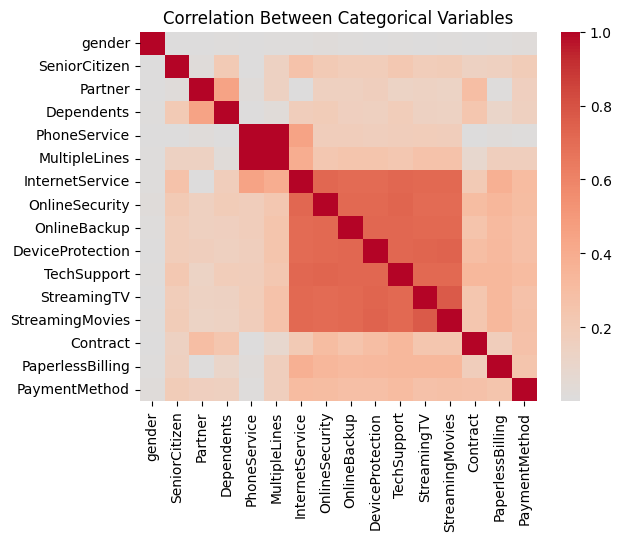

In [28]:
# Checking correlation among the categorical variables

cramer_matrix = pd.DataFrame(index=cat_col, columns=cat_col)

for col1 in cat_col:
    for col2 in cat_col:
        if col1 == col2:
            cramer_matrix.loc[col1, col2] = 1.0
        else:
            table = pd.crosstab(clone_df[col1], clone_df[col2])
            cramer_matrix.loc[col1, col2] = cramers_v(table.values)

cramer_matrix = cramer_matrix.astype(float)

sns.heatmap(cramer_matrix, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Between Categorical Variables")
plt.show()


A few of the columns, such as 'InternetService', 'OnlineSecurity', 'DeviceProtection', and 'StreamingTV' have more red squares than others, suggesting higher correlation with other categorical variables than most. 'PhoneService' and 'MultipleLines' have a correlation of 1.000, effectively rendering them redundant. Aside from that, there may be more collinearity within the dataset

The analysis showed a bimodal distribution for the 'tenure' variable, which also has the highest correlation with churn among the continuous variables. 'MonthlyCharges' and 'TotalCharges' are right-skewed and have weak relationships with churn ('TotalCharges' is highly correlated with both 'MonthlyCharges' and 'tenure'). Among the categorical variables, the three most strongly correlated with churn are 'Contract', 'OnlineSecurity', and 'TechSupport', with 'Contract' showing the highest correlation at 0.401. 'Gender', on the other hand, has almost no predictive power regarding customer churn (0.008) and shows very weak relationships with other categorical variables. A few categorical variables are also highly correlated with each other, effectively making them redundant. These will be addressed during Feature Engineering.

--------------------

## Feature Engineering

In [29]:
# Dropping 'MultipleLines' to reduce risk of collinearity. As shown before, it risks collinearity with 'PhoneService' as it has a 1.000 correlation

clone_df.drop('MultipleLines', axis = 1, inplace = True)



In [30]:
print(clone_df.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')


In [31]:
# Dropping 'StreamingMovies' to reduce risk of collinearity, as it has a very strong relationship with 'StreamingTV'.

clone_df.drop('StreamingMovies', axis = 1, inplace = True)

In [32]:
print(clone_df.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')


Since I have already changed the categorical columns with two options (Yes/No) into binary, I will now one-hot encode the other categorical variables. They have more than two options, and must be encoded differently as a result.

In [33]:
# One-hot encoding the rest of the categorical variables

categorical_var = clone_df.select_dtypes(include=['object']).columns.tolist()

non_binary_cat_cols = [col for col in categorical_var if clone_df[col].nunique() >= 3]

print(non_binary_cat_cols)


['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'Contract', 'PaymentMethod']


I will one-hot encode the non-binary categorical columns. For the service add-ons, each encoding creates three new columns, but I will drop one from each since the model can infer the third option from the other two. The only exceptions are 'Contract', 'PaymentMethod', and 'InternetService', as those need to retain all of their categories.

In [34]:
clone_df.shape

(7032, 18)

In [35]:
service_addons = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV']

for col in service_addons:
    clone_df[col] = pd.Categorical(
        clone_df[col],
        categories=["No internet service", "No", "Yes"],
        ordered=True
    )

service_dummies = pd.get_dummies(clone_df[service_addons], drop_first=True)

clone_df = pd.concat([clone_df.drop(columns=service_addons), service_dummies], axis=1)

print("Added:", service_dummies.columns.tolist())


Added: ['OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes']


In [37]:
# Encoding the last three categorical columns

other_three = ['Contract', 'PaymentMethod', 'InternetService']

other_three_dummies = pd.get_dummies(clone_df[other_three], drop_first=False)

clone_df = pd.concat([clone_df.drop(columns=other_three), other_three_dummies], axis=1)

print("Added:", other_three_dummies.columns.tolist())


Added: ['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No']


In [49]:
# The encoding uses a boolean (True/False) type. I will change that to binary (0/1) for modeling
bool_col = clone_df.select_dtypes(include = ['bool']).columns
print(bool_col)

Index(['OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No'],
      dtype='object')


In [50]:
clone_df[bool_col] = clone_df[bool_col].astype(int)

In [51]:
clone_df[bool_col].head()

,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0
1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0
2,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0
3,0,1,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0
4,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0


In [52]:
clone_df.shape

(7032, 30)

Since I will be using linear models in the next phase (in addition to decision trees), I will standardize the continuous data in the data frame.

In [54]:
# Standardizing the columns with continuous data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

clone_df[non_binary_num_cols] = scaler.fit_transform(clone_df[non_binary_num_cols])



In [55]:
clone_df[non_binary_num_cols].head()

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457


In [58]:
clone_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,Female,0,1,0,-1.280248,0,1,-1.161694,-0.994194,0,...,1,0,0,0,0,1,0,1,0,0
1,Male,0,0,0,0.064303,1,0,-0.260878,-0.173740,0,...,0,1,0,0,0,0,1,1,0,0
2,Male,0,0,0,-1.239504,1,1,-0.363923,-0.959649,1,...,1,0,0,0,0,0,1,1,0,0
3,Male,0,0,0,0.512486,0,0,-0.747850,-0.195248,0,...,0,1,0,1,0,0,0,1,0,0
4,Female,0,0,0,-1.239504,1,1,0.196178,-0.940457,1,...,1,0,0,0,0,1,0,0,1,0


In [59]:
# forgot to encode 'gender'. I will do that now.

clone_df['gender'] = clone_df['gender'].map({'Male': 1, 'Female': 0})


In [60]:
clone_df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,0,...,1,0,0,0,0,1,0,1,0,0
1,1,0,0,0,0.064303,1,0,-0.260878,-0.173740,0,...,0,1,0,0,0,0,1,1,0,0


----------

## Modeling

The data set has been cleaned, explored, and readied for the modeling phase

In [62]:
# Train/test split

from sklearn.model_selection import train_test_split

X = clone_df.drop(columns=['Churn'])
y = clone_df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (5625, 29) (5625,)
Test shape: (1407, 29) (1407,)


In [63]:
# Starting with Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:,1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Confusion Matrix:
 [[918 115]
 [160 214]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

ROC-AUC Score: 0.8370653462476252


The model performs well at detecting customers who did not churn, with a precision of 85% and a recall of 89%. However, when predicting customers who did churn, performance drops to a precision of 65% and a recall of 57%. Overall accuracy stands at 80%. While there is room for improvement (particularly in capturing churned customers), this provides a solid baseline for comparison with more complex models.

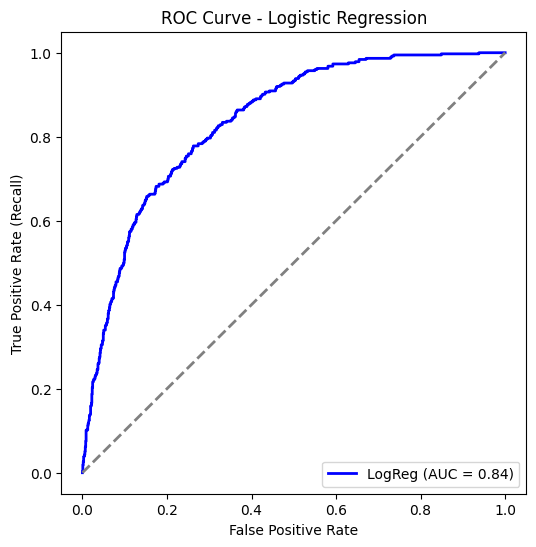

In [65]:
# Plotting ROC curve for Logistic Regression

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'LogReg (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

The ROC curve depicted above shows a solid baseline performance from the Logistic Regression model, with an AUC of 0.84

In [68]:
# Moving on to Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

y_pred_dt = dt_clf.predict(X_test)
y_prob_dt = dt_clf.predict_proba(X_test)[:,1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_dt))

Confusion Matrix:
 [[827 206]
 [203 171]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1033
           1       0.45      0.46      0.46       374

    accuracy                           0.71      1407
   macro avg       0.63      0.63      0.63      1407
weighted avg       0.71      0.71      0.71      1407

ROC-AUC Score: 0.6291213484425716


As gathered from the data, the Decision Tree’s baseline performance is lackluster, especially when it comes to predicting customers who churn. With an accuracy of 71%, it performed noticeably worse than Logistic Regression. However, the real issue lies in its ability (or lack thereof) to accurately predict churn. Precision for these customers is just 45%, while recall is similarly low at 46%. This may be due to the lack of hyperparameter tuning.

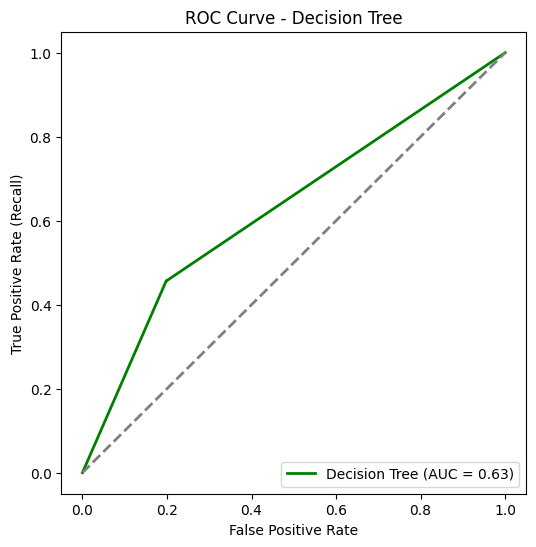

In [69]:
# ROC curve for Decision Tree

fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

The curve further demonstrates the poor performance of Decision Tree with an AUC of 0.63. This suggests that the model was only moderately more reliable than a coin toss regarding predicting customer churn.

Confusion Matrix:
 [[914 119]
 [192 182]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      1033
           1       0.60      0.49      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407

ROC-AUC Score: 0.810879997515155


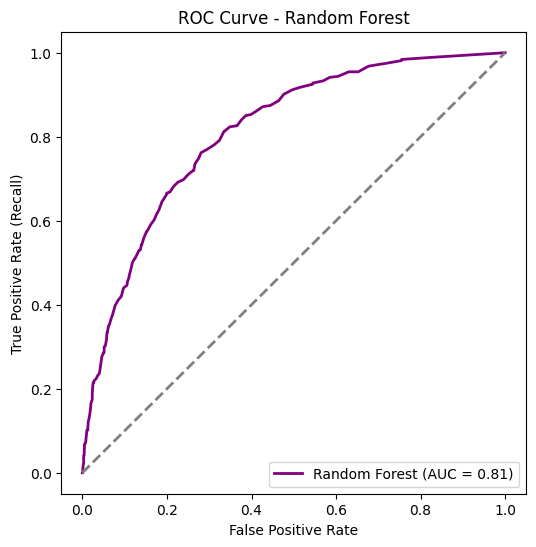

In [70]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)
y_prob_rf = rf_clf.predict_proba(X_test)[:,1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))

# ROC curve for Random Forest
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()


While not performing quite as well as Logistic Regression, Random Forest achieved an accuracy of 78%, comfortably outperforming the Decision Tree baseline. Like the other models, it performed strongly when predicting customers who did not churn. However, it was noticeably conservative in its churn predictions, with recall dropping to just 49%. Despite this limitation, overall performance remained satisfactory, with an AUC of 0.81.

Confusion Matrix:
 [[891 142]
 [179 195]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85      1033
           1       0.58      0.52      0.55       374

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.77      0.77      1407

ROC-AUC Score: 0.8109744733940394


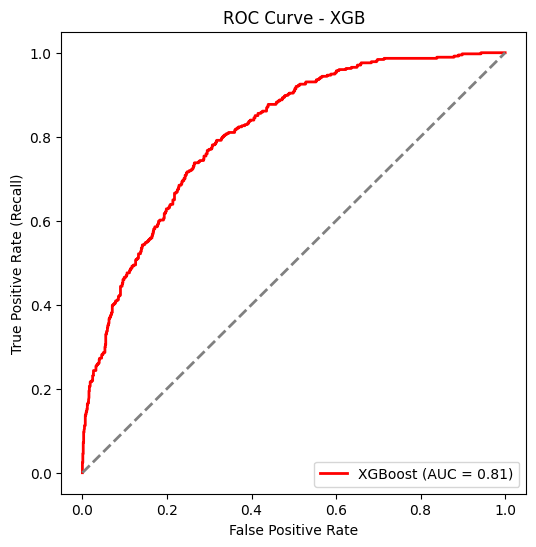

In [71]:
# Now running XGBoost

from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)
y_prob_xgb = xgb_clf.predict_proba(X_test)[:,1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_xgb))

# ROC curve for XGB
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - XGB')
plt.legend(loc="lower right")
plt.show()


XGBoost performed similarly with Random Forest with numbers just slightly behind. However, it showed a slightly higher customer churn recall (52%). That said, its overall accuracy was slightly lower (77%). The ROC curve was near identical to Random Forest and the AUC was equivalent.

Confusion Matrix:
 [[926 107]
 [184 190]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.51      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.78      0.79      0.79      1407

ROC-AUC Score: 0.7835363486237583


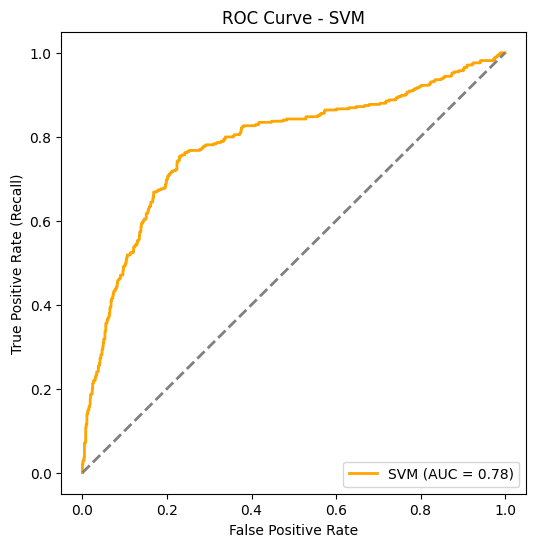

In [72]:
# Support Vector Machine (SVM)

from sklearn.svm import SVC

svm_clf = SVC(probability=True, random_state=42)  # probability=True so we can get predict_proba for ROC
svm_clf.fit(X_train, y_train)

y_pred_svm = svm_clf.predict(X_test)
y_prob_svm = svm_clf.predict_proba(X_test)[:,1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_svm))

# ROC curve for SVM
fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'SVM (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - SVM')
plt.legend(loc="lower right")
plt.show()


The SVM classification report shows respectable performance from the model. It achieved the highest accuracy of any model other than Logistic Regression (79%) and the highest recall among all models for non-churned customers. However, its AUC (0.78) was lower than both Random Forest and XGBoost.

After testing five algorithms on the cleaned dataset, I will be tuning Logistic Regression, as it was the highest performing at baseline. I will subsequently tune Random Forest and XGB. 

Best Parameters: {'C': 10, 'class_weight': None, 'penalty': 'l2'}
Best Cross-Validation AUC: 0.8456108740191276

Confusion Matrix:
 [[916 117]
 [161 213]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

Test ROC-AUC Score: 0.8371844117388221


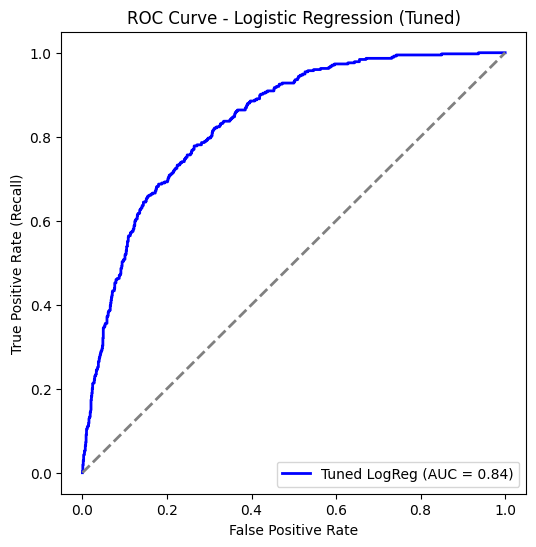

In [73]:
# Tuning Logistic Regression and retesting it

from sklearn.model_selection import GridSearchCV

# hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], 
    'penalty': ['l1', 'l2'], 
    'class_weight': [None, 'balanced']
}

log_reg = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)

grid = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,              
    scoring='roc_auc',      
    n_jobs=-1               
)

grid.fit(X_train, y_train)


print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation AUC:", grid.best_score_)

best_log_reg = grid.best_estimator_
y_pred_best = best_log_reg.predict(X_test)
y_prob_best = best_log_reg.predict_proba(X_test)[:,1]

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("Test ROC-AUC Score:", roc_auc_score(y_test, y_prob_best))

# ROC Curve for best model Logistic Regression
fpr, tpr, thresholds = roc_curve(y_test, y_prob_best)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Tuned LogReg (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Logistic Regression (Tuned)')
plt.legend(loc="lower right")
plt.show()


Logistic Regression, when tuned, showed similar capabilities to its baseline. Its accuracy remained at 80% and its AUC at 0.84, along with similar numbers in recall and precision.

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation AUC: 0.8458627223918308

Confusion Matrix:
 [[797 236]
 [ 89 285]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.77      0.83      1033
           1       0.55      0.76      0.64       374

    accuracy                           0.77      1407
   macro avg       0.72      0.77      0.73      1407
weighted avg       0.81      0.77      0.78      1407

Test ROC-AUC Score: 0.8331180663764229


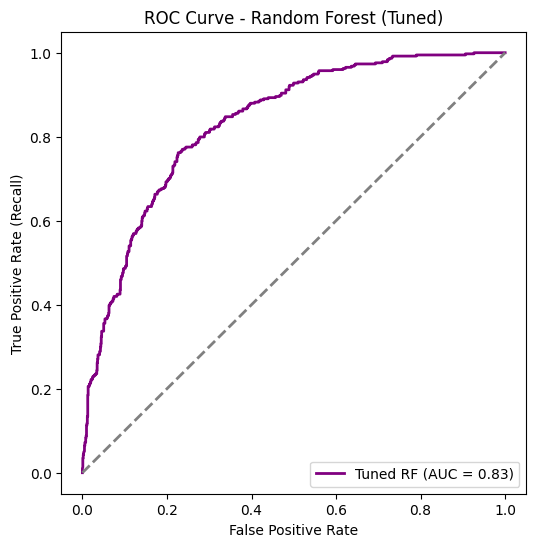

In [74]:
# Tuning Random Forest and retesting it

param_grid = {
    'n_estimators': [100, 200],  
    'max_depth': [None, 10, 20],     
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],     
    'class_weight': [None, 'balanced']
}

rf = RandomForestClassifier(random_state=42)

grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation AUC:", grid.best_score_)

# Evaluate on test set
best_rf = grid.best_estimator_
y_pred_best = best_rf.predict(X_test)
y_prob_best = best_rf.predict_proba(X_test)[:,1]

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("Test ROC-AUC Score:", roc_auc_score(y_test, y_prob_best))

# ROC Curve for Random Forest
fpr, tpr, thresholds = roc_curve(y_test, y_prob_best)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'Tuned RF (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Random Forest (Tuned)')
plt.legend(loc="lower right")
plt.show()


As shown, Random Forest performed noticeably better after hyperparameter tuning. Although it dropped in non-churn recall (from 88% to 77%) and slightly in churn recall (from 60% to 55%), it saw a large improvement in churned-customer recall (from 49% to 76%) and a moderate increase in non-churn precision (from 83% to 90%). The AUC also rose from 0.81 to 0.83. Although hyperparameter tuning clearly improved performance, Random Forest still did not outperform Logistic Regression, as its accuracy (77%) and AUC remain lower.

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters: {'subsample': 0.8, 'reg_lambda': 5, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.6}
Best Cross-Validation AUC: 0.8481500076931174

Confusion Matrix:
 [[919 114]
 [180 194]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.72      1407
weighted avg       0.78      0.79      0.78      1407

Test ROC-AUC Score: 0.8367417987171986


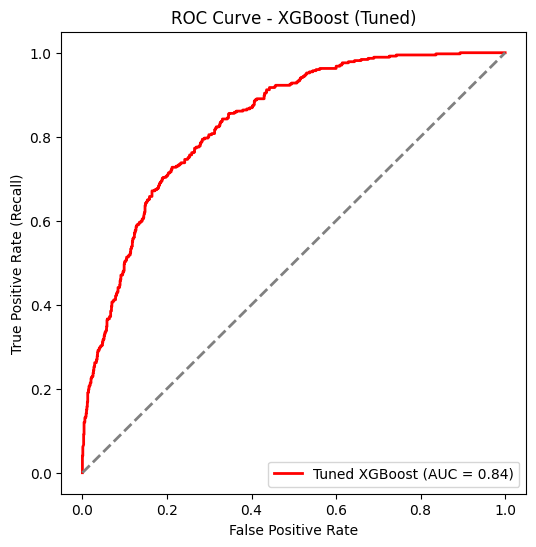

In [75]:
# Tuning XGB and retesting it

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.25, 0.5],
    'reg_lambda': [1, 5, 10]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=25,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation AUC:", random_search.best_score_)

best_xgb = random_search.best_estimator_
y_pred_best = best_xgb.predict(X_test)
y_prob_best = best_xgb.predict_proba(X_test)[:,1]

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("Test ROC-AUC Score:", roc_auc_score(y_test, y_prob_best))

# ROC Curve for XGB
fpr, tpr, thresholds = roc_curve(y_test, y_prob_best)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'Tuned XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - XGBoost (Tuned)')
plt.legend(loc="lower right")
plt.show()


As seen, XGB’s performance improved significantly after hyperparameter tuning. While there was no major jump in any single metric (as there was in Random Forest’s churn recall), the model showed balanced improvements across nearly all categories. Its accuracy rose from 77% to 79%, and its AUC improved from 0.81 to 0.84, the largest AUC increase observed during tuning. That said, XGB’s performance remained below that of Logistic Regression, which continues to lead in accuracy, recall, precision, and AUC.

-----------

## Conclusion

In [79]:
# Making a table for the final results
results = {
    "Model": ["Logistic Regression (Tuned)", "Random Forest (Tuned)", "XGBoost (Tuned)"],
    "Accuracy": [0.80, 0.77, 0.79],
    "AUC": [0.84, 0.83, 0.84],
    "Churn Precision": [0.65, 0.55, 0.63],
    "Churn Recall": [0.57, 0.76, 0.52],
    "Churn F1": [0.61, 0.64, 0.57]
}


results_df = pd.DataFrame(results)

results_df

,Model,Accuracy,AUC,Churn Precision,Churn Recall,Churn F1
0,Logistic Regression (Tuned),0.80,0.84,0.65,0.57,0.61
1,Random Forest (Tuned),0.77,0.83,0.55,0.76,0.64
2,XGBoost (Tuned),0.79,0.84,0.63,0.52,0.57


In [80]:
# Determining the most important features in predicting churn for Logistic Regression


feature_names = X_train.columns

coefs = best_log_reg.coef_[0]

logreg_importance = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefs,
    "Abs_Coefficient": np.abs(coefs)
}).sort_values(by="Abs_Coefficient", ascending=False)

logreg_importance.head(10)


,Feature,Coefficient,Abs_Coefficient
4,tenure,-1.387065,1.387065
5,PhoneService,-1.054933,1.054933
21,Contract_Two year,-0.842764,0.842764
8,TotalCharges,0.713625,0.713625
7,MonthlyCharges,0.678032,0.678032
19,Contract_Month-to-month,0.580771,0.580771
10,OnlineSecurity_Yes,-0.389815,0.389815
16,TechSupport_Yes,-0.372814,0.372814
6,PaperlessBilling,0.296071,0.296071
12,OnlineBackup_Yes,-0.267257,0.267257


The table above lists the top ten features used to predict churn for the logistic regression model. Many of the service add-ons are present in the table, as well as charges and contract types. The three features with the strongest effect on churn were 'tenure', 'PhoneService', and 'Contract_Two year'. Given that the coefficient for 'tenure' is a negative number, we can infer that longer tenure reduces churn odds (that is, the longer someone has been a customer, the lower their likelihood of churning). This is a similar case (albeit with a weaker effect) with 'PhoneService' (having phone service is related to lower churn odds) and 'Contract_Two year' (two-year contracts specifically are related to lower churn odds). These coefficients show that a willingness to stay with the company is associated with certain add-ons and how long the customer has been with the company. Interestingly, however, 'TotalCharges' is related to higher churn odds despite higher tenure being related to lower churn odds. This could be explained by certain customers experiencing what they may perceive as exorbitantly high rates, causing them to part with the company's services.

In [81]:
# Determining the most important features in predicting churn for Logistic Regression

rf_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": best_rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

rf_importance.head(10)


,Feature,Importance
19,Contract_Month-to-month,0.143570
4,tenure,0.136535
8,TotalCharges,0.107267
7,MonthlyCharges,0.093408
9,OnlineSecurity_No,0.081739
15,TechSupport_No,0.061596
21,Contract_Two year,0.059861
27,InternetService_Fiber optic,0.046911
24,PaymentMethod_Electronic check,0.035138
20,Contract_One year,0.023509


The table above lists the top ten features most important in Random Forest’s training and testing. Unlike the Logistic Regression model, this table does not contain coefficients, nor does it provide insight into the strength of any one feature’s effect on churn odds. However, it does indicate the relative importance of each feature in the model's predictions. The three most important features in this regard were 'Contract_Month-to-month', 'tenure', and 'TotalCharges'. 'Contract_Month-to-month' is the most important feature used by Random Forest in its predictions. Though that feature is important, it is interesting that it ranked so high on the list. According to the Logistic Regression table, it is the sixth most important feature in predicting churn. 'tenure' is second on the list, which was expected given its prominence in the Logistic Regression model. 'TotalCharges' placed third, which was another predictable outcome. 'Contract_Two year' was seventh on the list, a stark contrast to its third-place ranking on the Logistic Regression model's coefficient table. This could be explained by the fact that there were more than double the number of month-to-month contracts in the dataset compared to two-year contracts (see value counts below).

In [83]:
print(clone_df['Contract_Two year'].value_counts())

print(clone_df['Contract_Month-to-month'].value_counts())

Contract_Two year
0    5347
1    1685
Name: count, dtype: int64
Contract_Month-to-month
1    3875
0    3157
Name: count, dtype: int64


In [84]:
# Determining the most important features in predicting churn for XGB

xgb_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": best_xgb.feature_importances_
}).sort_values(by="Importance", ascending=False)

xgb_importance.head(10)


,Feature,Importance
19,Contract_Month-to-month,0.325469
9,OnlineSecurity_No,0.112581
15,TechSupport_No,0.110239
27,InternetService_Fiber optic,0.069127
21,Contract_Two year,0.053567
26,InternetService_DSL,0.043606
24,PaymentMethod_Electronic check,0.028517
4,tenure,0.024154
18,StreamingTV_Yes,0.021736
20,Contract_One year,0.020690


The table above lists the top ten features most important in XGBoost's training and testing. Aside from its most important feature used in modeling ('Contract_Month-to-month'), its other top features deviate quite dramatically. The second, third, and fourth most important features are all associated with add-ons rather than contracts, tenure, or charges. These feature importance results differ significantly not only from Random Forest's results but also from Logistic Regression's. 'tenure', the top coefficient in the Logistic Regression table and second in the Random Forest table, ranks only eighth in XGBoost's table. This suggests that it was less influential in XGBoost’s modeling (even less so than the unexpected feature 'PaymentMethod_Electronic check'), which was unforeseen.

That said, 'Contract_Month-to-month' was not only the most important feature but stood far above the rest, with an importance value of 0.325, well ahead of even second place ('OnlineSecurity_No'). This indicates that the feature was extremely influential in the model's predictions. Another interesting observation is that 'Contract_One year' appeared in the top ten for feature importance, despite not being present in either of the other tables. It is clear that XGBoost leveraged its features differently from both Random Forest and Logistic Regression.

Looking at the three feature importance tables for each model, it is immediately clear that 'tenure' is one of the most important features, along with 'Contract_Month-to-month'. That said, all three tables support the idea that contracts, tenure, and add-ons are important factors for all models when predicting churn. Charges, though important to Random Forest and Logistic Regression, did not appear in the top ten most important features for XGBoost, which was another unexpected observation. Although each model achieved relatively similar performance, their methods differed. Despite this, they all provided meaningful insight into the dataset.

---------

## Conclusion

The Logistic Regression model had the best performance and was shown to be the best at determining whether a customer would churn or not. That said, Random Forest was the best at catching churn (though it was also more inaccurate, meaning it was more liberal in its prediction of churn). Overall, Logistic Regression performed the best, with XGB a close second.

Looking deeper into the results, a customer's likelihood of parting ways with the company is highly dependent on how long they have been with the company, their contract type, their add-ons (specifically whether they have phone service or not), and how much they are paying for the company's services.

Although tenure is a prominent factor in predicting customer churn, it may not prove very useful in preventing churn, as it seems to be redundant and not actionable. When assessing churn, it is best to look at contract type, customer charges, and their add-ons, specifically whether they have phone services in their plan or not. Predictably, customers who are charged more have a higher likelihood to churn. Customers on monthly contracts are more likely to churn as well (as opposed to customers with one-year or two-year contracts). Finally, more add-ons to a customer's service are related to lower odds of churning, the most prominent add-on in this regard being phone service.

Churn can possibly be deterred or mitigated by pushing phone service. Additional add-ons can be emphasized as well, but phone service is the most important in most cases. Two-year contracts should be incentivized, for example, bundling an add-on such as phone service with a discounted charge if a customer opts for the contract. Overall, exploring ways to push phone service and longer contracts at discounted or lower prices may lead to lower customer churn within the company.

In summary: Logistic Regression was the best overall model for predicting churn, with Random Forest strongest at catching churners. Contract type, tenure, charges, and add-ons consistently drove churn risk. Customers on month-to-month contracts with higher charges and fewer add-ons are most at risk. Retention strategies should focus on incentivizing longer contracts, bundling add-ons like phone service, and providing cost relief for high-charge customers.